### Arav Bhardwaj

**1A Solution** 

In [1]:
from math import sqrt
data = [5.99342831, 4.7234714 , 
        6.29537708, 8.04605971, 
        4.53169325, 4.53172609, 
        8.15842563, 6.53486946, 
        4.06105123, 6.08512009]


def analyze(data):
    length = len(data)
    mean = sum(data) / length
    stdev = sum([(n - mean) ** 2 for n in data]) / length
    return length, mean, stdev

length, mean, stdev = analyze(data)
print(f'Length: {length}, Mean: {mean}, Stdev: {stdev}')

Length: 10, Mean: 5.896122225000001, Stdev: 1.881867777738248


**1B Solution**

In [100]:
def t_test(data, threshold):
    length, mean, stdev = analyze(data)
    moe = (2.26216 * stdev) / sqrt(length)
    upper_limit = mean + moe
    lower_limit = mean - moe 
    flag = 'Good' if upper_limit <= threshold <= lower_limit else 'Bad'
    return flag

flag = t_test(data, 4)
print(flag)

Bad


**1C Solution**

In [176]:
import pandas as pd
class GeneTest():
    def __init__(self, csv_path):
        self.df = pd.read_csv(csv_path, header=None)
        self.df = self.df.drop(self.df.columns[0], axis=1)
        self.df = self.df.iloc[1:] 
    
    def get_df(self):
        return self.df 
    
    def gene_t_test(self, data, threshold = 4):
        length, mean, stdev = analyze(self.df)
        print(length)
        moe = (2.26216 * stdev) / sqrt(length)
        upper_limit = mean + moe
        lower_limit = mean - moe 
        flag = 'Good' if upper_limit >= threshold and threshold <= lower_limit else 'Bad'
        return flag
    
    def testData(self):
        lst = []
        for _, row in self.df.iterrows():
            row = [float(x) for x in row]
            lst.append(t_test(row, 4))
        return lst
gene_test = GeneTest(r'/Users/abharw/Desktop/Levy Lab/technical_data/1_c_d.csv')
df2 = gene_test.testData()
print(df2)

['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad']


**1D Solution**

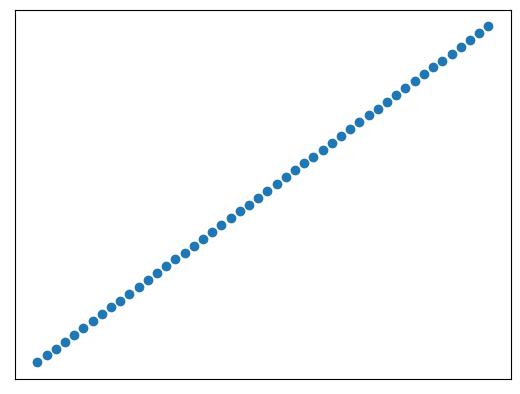

In [177]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def scatterplot(lst1, lst2):
    plt.scatter(lst1, lst2)
    plt.xticks([])  # turn off ticks
    plt.yticks([])  

gene_df = GeneTest(r'/Users/abharw/Desktop/Levy Lab/technical_data/1_c_d.csv')  
gene_plot = gene_df.get_df()
scatterplot(gene_plot.iloc[0], gene_plot.iloc[1])

**2D Solution**

In [188]:
import torch 
import numpy as np 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm import tqdm 

# convert to tensor values and normalize  mean and std
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((.5,), (.5),)]) 

# load datasets
train = datasets.FashionMNIST('./F_MNIST', download = True, train = True, transform = transform)
test = datasets.FashionMNIST('./F_MNIST', download = True, train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train, shuffle = True, batch_size = 64)
test_loader = torch.utils.data.DataLoader(test, shuffle = True, batch_size = 64)

# network architecture
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(x, dim=1)
        return x

net = Net()
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [190]:
def fit(model, train_loader):
    model.train()
    train_running_loss = 0.0; train_running_correct = 0
    for data in tqdm(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)

        train_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        train_running_correct += (preds == labels).sum().item()
        loss.backward()
        optimizer.step()
        
    train_loss = train_running_loss / len(train_loader.dataset)
    train_accuracy = 100. * train_running_correct / len(train_loader.dataset)
    
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}')

    return train_loss, train_accuracy


In [ ]:
def validate(model, test_loader):
    model.eval()
    val_running_loss = 0.0; val_running_correct = 0
    for data in tqdm(test_loader):
        inputs, labels = data
        output = model(inputs)
        loss = criterion(output, labels)
        
        val_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        val_running_correct += (preds == labels).sum().item()
        
    val_loss = val_running_loss / len(test_loader.dataset)
    val_accuracy = 100. * val_running_correct / len(test_loader.dataset)
    
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}')

    return val_loss, val_accuracy

In [189]:
train_loss, train_acc = [], []
val_loss, val_acc, = [], []

for epoch in range(5):
    print(f'Epoch {epoch + 1}')
    train_epoch_loss, train_epoch_acc = fit(net, train_loader)
    val_epoch_loss, val_epoch_acc = validate(net, train_loader)
    train_loss.append(train_epoch_loss); train_acc.append(train_epoch_acc)
    val_loss.append(val_epoch_loss); val_acc.append(val_epoch_acc)

Epoch 1


100%|██████████| 938/938 [00:03<00:00, 278.35it/s]


Train Loss: 0.0187, Train Accuracy: 56.97


100%|██████████| 938/938 [00:02<00:00, 419.94it/s]


Validation Loss: 0.0147, Validation Accuracy: 64.70
Epoch 2


100%|██████████| 938/938 [00:03<00:00, 291.50it/s]


Train Loss: 0.0141, Train Accuracy: 65.50


100%|██████████| 938/938 [00:02<00:00, 412.38it/s]


Validation Loss: 0.0133, Validation Accuracy: 66.94
Epoch 3


100%|██████████| 938/938 [00:03<00:00, 292.59it/s]


Train Loss: 0.0138, Train Accuracy: 66.04


100%|██████████| 938/938 [00:02<00:00, 415.93it/s]


Validation Loss: 0.0136, Validation Accuracy: 67.00
Epoch 4


100%|██████████| 938/938 [00:03<00:00, 271.21it/s]


Train Loss: 0.0136, Train Accuracy: 66.70


100%|██████████| 938/938 [00:02<00:00, 395.93it/s]


Validation Loss: 0.0141, Validation Accuracy: 65.45
Epoch 5


100%|██████████| 938/938 [00:03<00:00, 270.25it/s]


Train Loss: 0.0134, Train Accuracy: 66.86


100%|██████████| 938/938 [00:02<00:00, 405.59it/s]

Validation Loss: 0.0138, Validation Accuracy: 67.32


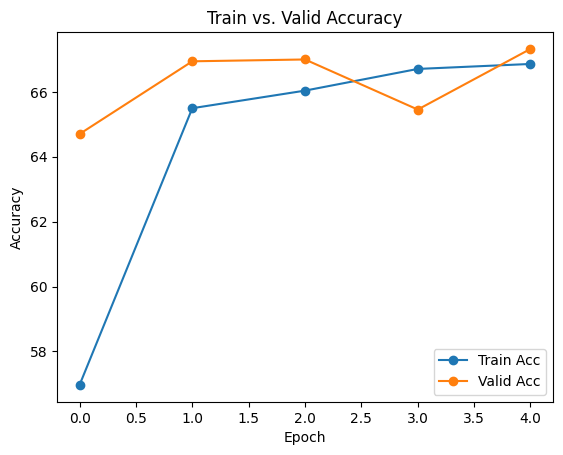

In [191]:
plt.plot(train_acc,'-o')
plt.plot(val_acc,'-o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Acc','Valid Acc'])
plt.title('Train vs. Valid Accuracy')
plt.show()